In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
import seaborn as sns 

import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

### Постановка задачи

$$
u_t = u_{xx} + b u
$$
$$
u(t, 0) = u(t, 1) = 0
$$
$$
u(t = 0, x) = \sin \pi x
$$
Решение:
$$
u(t, x) = \exp \{- t (\pi ^2 - b)\} \sin \pi x
$$


Видно, что при $b > \pi^2$ решение становится экспоненциально возрастающим. Как можно с этим бороться? Поставим другую задачу:

In [3]:
def solve_parabolic_implicit(u0_func, u_left, u_right, L=1.0, N=50, b=1.0, T=0.1, dt=0.001):
    h = L/(N-1)
    x = np.linspace(0, L, N)

    nt = int(T/dt)

    u = np.array([u0_func(xi) for xi in x], dtype=float)
    
    u[0] = u_left(0.0)
    u[-1] = u_right(0.0)

    mu = dt/h**2

    main_diag = (1 + 2*mu - dt*b)*np.ones(N-2)
    off_diag = -mu * np.ones(N-3)

    ab = np.zeros((3, N-2))
    ab[0,1:] = off_diag     
    ab[1,:] = main_diag     
    ab[2,:-1] = off_diag    

    u_all = [u.copy()]

    for n in range(nt):
        t_new = (n+1)*dt

        left_val = u_left(t_new)
        right_val = u_right(t_new)

        rhs = u[1:-1].copy()

        rhs[0] += mu * left_val
        rhs[-1] += mu * right_val

        u_inner = solve_banded((1,1), ab, rhs)

        u[1:-1] = u_inner
        u[0] = left_val
        u[-1] = right_val

        u_all.append(u.copy())

    return x, u_all


### Тест

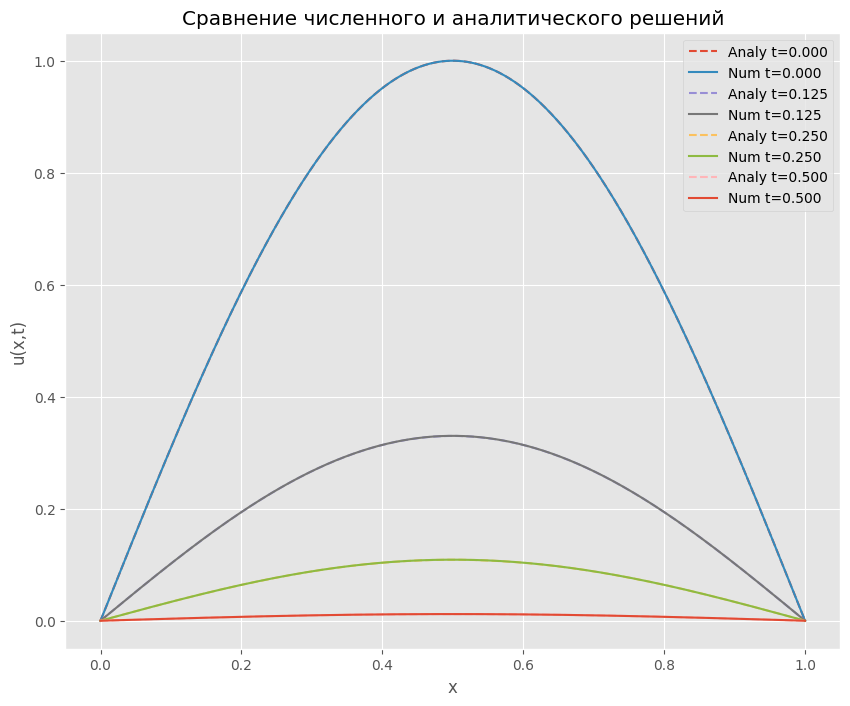

In [4]:
u0 = lambda x: np.sin(np.pi * x) 

u_left = lambda t: 0.0 
u_right = lambda t: 0.0

L = 1.0
N = 1000
b = 1.0
T = 0.5
dt = 0.0001

x, solutions = solve_parabolic_implicit(u0, u_left, u_right, L, N, b, T, dt)

steps_to_plot = [0, len(solutions)//4, len(solutions)//2, len(solutions)-1]

u_analytical = lambda t, x: np.exp(-t * (np.pi**2 - b)) * np.sin(np.pi * x)

plt.figure(figsize=(10, 8))

for i in steps_to_plot:
    t = i * dt
    u_analyt = u_analytical(t, x)
    plt.plot(x, u_analyt, '--', label=f'Analy t={t:.3f}')
    plt.plot(x, solutions[i], label=f'Num t={t:.3f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Сравнение численного и аналитического решений')
plt.grid(True)
plt.legend()
plt.show()

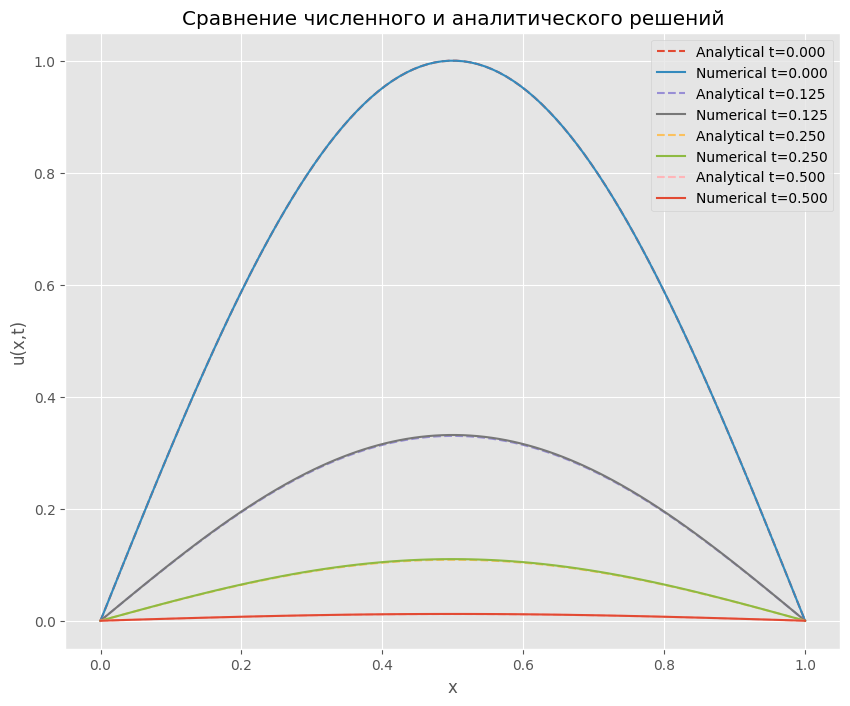

In [5]:
u0 = lambda x: np.sin(np.pi * x) 

u_left = lambda t: 0.0 
u_right = lambda t: 0.0

L = 1.0
N = 100
b = 1.0
T = 0.5
dt = 0.001

x, solutions = solve_parabolic_implicit(u0, u_left, u_right, L, N, b, T, dt)

steps_to_plot = [0, len(solutions)//4, len(solutions)//2, len(solutions)-1]

u_analytical = lambda t, x: np.exp(-t * (np.pi**2 - b)) * np.sin(np.pi * x)

plt.figure(figsize=(10, 8))

for i in steps_to_plot:
    t = i * dt
    u_analyt = u_analytical(t, x)
    plt.plot(x, u_analyt, '--', label=f'Analytical t={t:.3f}')
    plt.plot(x, solutions[i], label=f'Numerical t={t:.3f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Сравнение численного и аналитического решений')
plt.grid(True)
plt.legend()
plt.show()

### Случай возрастающих решений

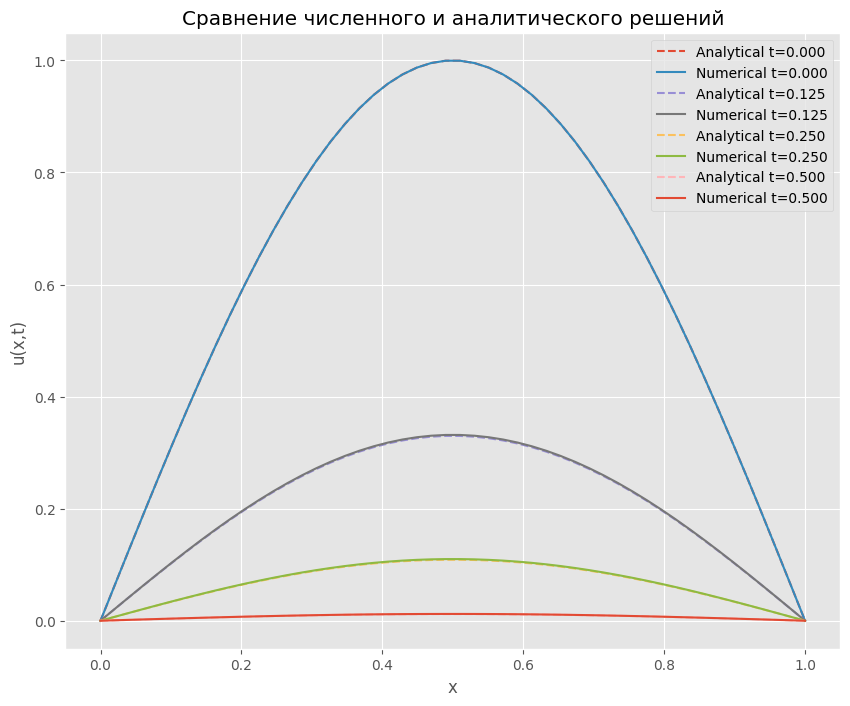

In [6]:
u0 = lambda x: np.sin(np.pi * x) 

u_left = lambda t: 0.0 
u_right = lambda t: 0.0

L = 1.0
N = 50
b = 1.0
T = 0.5
dt = 0.001

x, solutions = solve_parabolic_implicit(u0, u_left, u_right, L, N, b, T, dt)

steps_to_plot = [0, len(solutions)//4, len(solutions)//2, len(solutions)-1]

u_analytical = lambda t, x: np.exp(-t * (np.pi**2 - b)) * np.sin(np.pi * x)

plt.figure(figsize=(10, 8))

for i in steps_to_plot:
    t = i * dt
    u_analyt = u_analytical(t, x)
    plt.plot(x, u_analyt, '--', label=f'Analytical t={t:.3f}')
    plt.plot(x, solutions[i], label=f'Numerical t={t:.3f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Сравнение численного и аналитического решений')
plt.grid(True)
plt.legend()
plt.show()

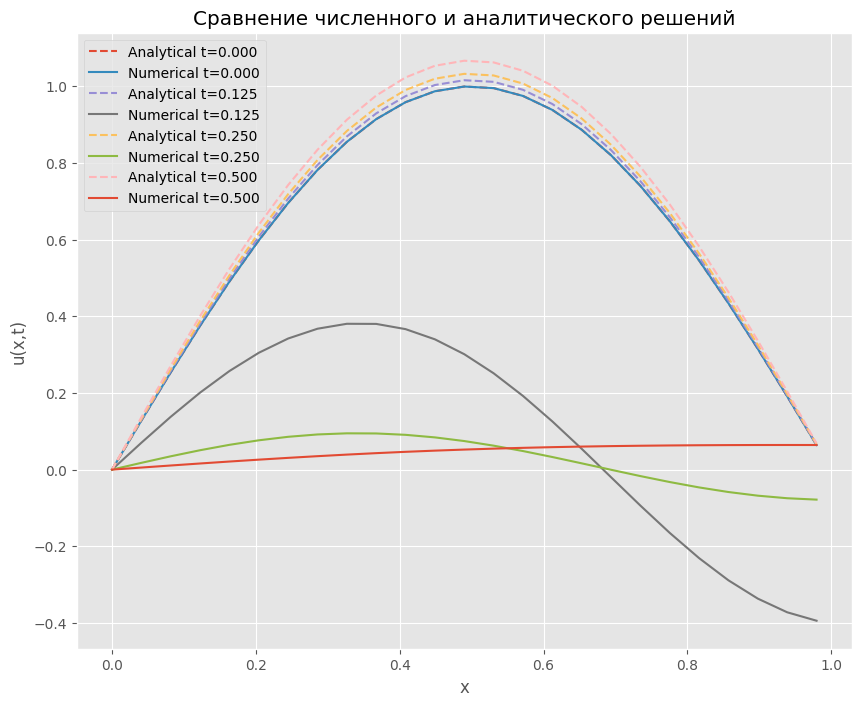

In [7]:
def u0(x):
    c1 = - 48 * np.pi / (9 * np.pi**2 - 64)
    c2 = -(9 * np.pi**2 + 64) / (9 * np.pi**2 - 64) 
    if x <= 1:
        return np.sin(np.pi * x)
    else:
        return c1 * np.sin(np.pi * x * 0.5) + c2 * np.sin(np.pi * x)


u0 = np.vectorize(u0)

u_left = lambda t: 0.0 
u_right = lambda t: 0.0

L = 2.0
N = 50
b = 10.0
T = 0.5
dt = 0.001

x, solutions = solve_parabolic_implicit(u0, u_left, u_right, L, N, b, T, dt)
x = x[:int(len(x) / 2)]

steps_to_plot = [0, len(solutions)//4, len(solutions)//2, len(solutions)-1]

u_analytical = lambda t, x: np.exp(-t * (np.pi**2 - b)) * np.sin(np.pi * x)

plt.figure(figsize=(10, 8))

for i in steps_to_plot:
    t = i * dt
    u_analyt = u_analytical(t, x)
    plt.plot(x, u_analyt, '--', label=f'Analytical t={t:.3f}')
    plt.plot(x, solutions[i][:len(x)], label=f'Numerical t={t:.3f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Сравнение численного и аналитического решений')
plt.grid(True)
plt.legend()
plt.show()

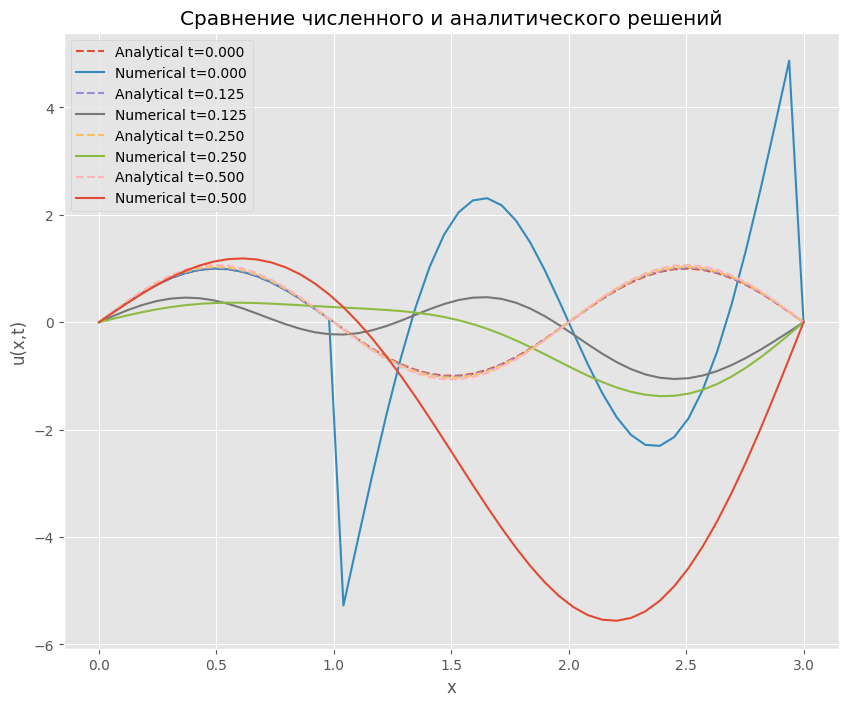

In [9]:
def u0(x):
    c1 = - 48 * np.pi / (9 * np.pi**2 - 64)
    c2 = -(9 * np.pi**2 + 64) / (9 * np.pi**2 - 64) 
    if x <= 1:
        return np.sin(np.pi * x)
    else:
        return c1 * np.sin(np.pi * x * 0.5) + c2 * np.sin(np.pi * x)


u0 = np.vectorize(u0)

u_left = lambda t: 0.0 
u_right = lambda t: 0.0

L = 3.0
N = 50
b = 10.0
T = 0.5
dt = 0.001

x, solutions = solve_parabolic_implicit(u0, u_left, u_right, L, N, b, T, dt)
# x = x[:int(len(x) / 2)]

steps_to_plot = [0, len(solutions)//4, len(solutions)//2, len(solutions)-1]

u_analytical = lambda t, x: np.exp(-t * (np.pi**2 - b)) * np.sin(np.pi * x)

plt.figure(figsize=(10, 8))

for i in steps_to_plot:
    t = i * dt
    u_analyt = u_analytical(t, x)
    plt.plot(x, u_analyt, '--', label=f'Analytical t={t:.3f}')
    plt.plot(x, solutions[i][:len(x)], label=f'Numerical t={t:.3f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Сравнение численного и аналитического решений')
plt.grid(True)
plt.legend()
plt.show()